In [1]:
import PyMca5 as mca
import numpy as np
import matplotlib.pyplot as plt

In [2]:
expdir = '/data/id01/inhouse/edo/IHR_20170831/'
imgdir = expdir + 'detector/'
specdir = expdir + 'spec/'
specfile = specdir + 'e16095_furnace.spec'

In [5]:
sf = mca.specfile.Specfile(specfile)
n_scans = int(sf.list()[2:])
print('{0} --> {1} scans'.format(specfile,n_scans))

/data/id01/inhouse/edo/IHR_20170831/spec/e16095_furnace.spec --> 130 scans


Scan table:

| Scan            | Temp   | 
| --------------- | ------ |
| 13,14           | RT     |
| 25              | 600    |
| 35, 36, 37      | 700    |
| 46, 47, 48      | 750    |
| 59, 57 60       | 800    |
| 68, 69, 70      | 850    |
| 83, 84, 85      | RT     |

**note!** need to subtract 1 from the logged scan numbers.

In [70]:
scan_no = [13,14,25,35,36,37,46,47,48,59,57,60,68,69,70,83,84,85]
for index in list(range(len(scan_no))): scan_no[index] = scan_no[index]-1

In [71]:
experiment = dict()
for i in scan_no:
    scan = sf[i]
    data = scan.data()
    spec_counters = scan.alllabels()
    counter_x = 'del'
    counter_y = 'roi3'
    x = data[spec_counters.index(counter_x)]
    y = data[spec_counters.index(counter_y)]
    experiment[i+1] = (x,y)

In [136]:
def ttheta(scan):
    return experiment[scan][0]
def roi3(scan):
    return experiment[scan][1]
def find_ratio(scan1, scan2, scale):
    last1 = experiment[scan1][1][len(experiment[scan1][1])-1]
    first2 = experiment[scan2][1][0]
    if scale == 'next':
        ratio = last1/first2
    elif scale == 'prev':
        ratio = first2/last1
    return ratio
def plt_roi3(scan, scale=None, **kwargs):
    if scale == None:
        plt.plot(ttheta(scan),roi3(scan),**kwargs)
    elif scale == 'next':
        plt.plot(ttheta(scan),roi3(scan)/find_ratio(scan,scan+1, scale),**kwargs)
    elif scale == 'prev':
        plt.plot(ttheta(scan),roi3(scan)/find_ratio(scan-1,scan, scale),**kwargs)

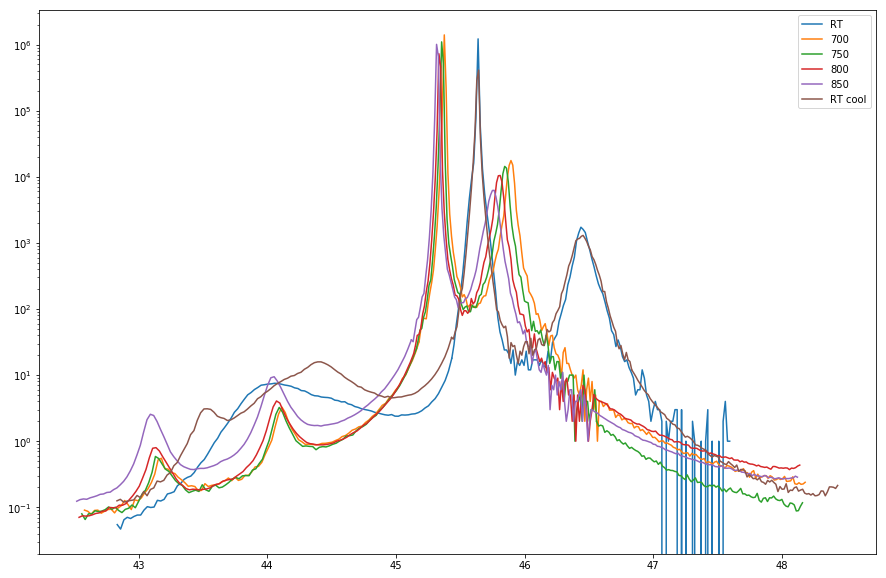

In [141]:
plt.figure(figsize=(15,10))

#RT
plt_roi3(13,scale='next',c='C0', label='RT')
plt_roi3(14,c='C0')
# 700
plt_roi3(35,scale='next',c='C1',label='700')
plt_roi3(36,c='C1')
plt_roi3(37,scale='prev',c='C1')
# 750
plt_roi3(46,scale='next',c='C2',label='750')
plt_roi3(47,c='C2')
plt_roi3(48,scale='prev',c='C2')
# 800
plt.plot(ttheta(59), roi3(59) / find_ratio(59,57,'next'),c='C3',label='800')
plt.plot(ttheta(57), roi3(57),c='C3')
plt.plot(ttheta(60), roi3(60) / find_ratio(57,60,'prev'),c='C3')

# 850
plt_roi3(68,scale='next',c='C4',label='850')
plt_roi3(69,c='C4')
plt_roi3(70,scale='prev',c='C4')
# RT
plt_roi3(83,scale='next',c='C5',label='RT cool')
plt_roi3(84,c='C5')
plt_roi3(85,scale='prev',c='C5')

plt.yscale('log')
plt.legend()
plt.show()